# ML_Group 08 - Numerical Data/ Time series data

* **ICT/21/865	Karunanayaka G.S**
* **ICT/21/894	Payagalage A.K**
* **ICT/21/840	Gayantha H.L.R**
* **ICT/21/891	Nawullage S.H**
* **ICT/21/879	Lakmini B.A.N.T**
* **ICT/21/807	Anuththara S.A**


The Dataset is Downloaded from **National Oceanic and Atmospheric Administration** Link to NOAA - https://www.noaa.gov/sites/default/files/2021-10/What-is-NOAA-2011.pdf

The Data set is About the **Climate info in Colombo, SriLanka.** from 2007.09.27 to 2024.01.15

Download link - https://www.ncei.noaa.gov/cdo-web/search

Check ***Asset Folder***  to get **information of proof**, **The Dataset** and **GHCND_documentation**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colombo-weather-data-station-cem00043466/3605132.csv


In [2]:
missing_value = ["N/A","na",np.nan]
df = pd.read_csv("/kaggle/input/colombo-weather-data-station-cem00043466/3605132.csv", index_col="DATE" ,na_values=missing_value)

In [3]:
df.head(10)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
9/27/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,0.0,",,S",28.1,"H,,S",30.6,",,S",NaN,NaN
9/28/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,0.0,",,S",28.5,"H,,S",30.6,",,S",NaN,NaN
9/29/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,2.5,",,S",28.2,"H,,S",30.6,",,S",NaN,NaN
9/30/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,1.0,",,S",28.3,"H,,S",30.5,",,S",NaN,NaN
10/1/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,0.0,",,S",28.5,"H,,S",30.9,",,S",NaN,NaN
10/4/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,0.0,",,S",28.3,"H,,S",30.6,",,S",NaN,NaN
10/7/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,0.0,",,S",26.9,"H,,S",30.1,",,S",NaN,NaN
10/11/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,1.0,",,S",26.6,"H,,S",29.6,",,S",NaN,NaN
10/16/2007,CEM00043466,"COLOMBO, CE",6.9,79.867,7,5.1,",,S",26.1,"H,,S",29.5,",,S",NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5480 entries, 9/27/2007 to 1/15/2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          5480 non-null   object 
 1   NAME             5480 non-null   object 
 2   LATITUDE         5480 non-null   float64
 3   LONGITUDE        5480 non-null   float64
 4   ELEVATION        5480 non-null   int64  
 5   PRCP             5446 non-null   float64
 6   PRCP_ATTRIBUTES  5446 non-null   object 
 7   TAVG             5480 non-null   float64
 8   TAVG_ATTRIBUTES  5480 non-null   object 
 9   TMAX             5074 non-null   float64
 10  TMAX_ATTRIBUTES  5074 non-null   object 
 11  TMIN             3910 non-null   float64
 12  TMIN_ATTRIBUTES  3910 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 599.4+ KB


In [5]:
df.isnull().sum()

STATION               0
NAME                  0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP                 34
PRCP_ATTRIBUTES      34
TAVG                  0
TAVG_ATTRIBUTES       0
TMAX                406
TMAX_ATTRIBUTES     406
TMIN               1570
TMIN_ATTRIBUTES    1570
dtype: int64

In [6]:
# Check missing data percentage
missing_percentage = df.apply(pd.isnull).sum()/df.shape[0]

In [7]:
missing_percentage
# No data higher than 75% is missing in any field.

STATION            0.000000
NAME               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
PRCP               0.006204
PRCP_ATTRIBUTES    0.006204
TAVG               0.000000
TAVG_ATTRIBUTES    0.000000
TMAX               0.074088
TMAX_ATTRIBUTES    0.074088
TMIN               0.286496
TMIN_ATTRIBUTES    0.286496
dtype: float64

Getting only core values by dropping unnecessary fields.

According to GHCND document core values are,
* PRCP = Precipitation (inches)
* TMAX = Maximum temperature (Celsius)
* TMIN = Minimum temperature (Celsius)
* TAVG = Average temperature (Celsius)

* SNOW = Snowfall 
* SNWD = Snow depth 

(SNOW,SNWD is not available in srilanka so we use only PRCP, TMAX, TMIN, TAVG fields)

In [8]:
df = df[["PRCP", "TAVG", "TMAX", "TMIN"]]

In [9]:
df.tail(5)

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1/10/2024,0.0,26.6,28.8,25.0
1/11/2024,0.0,27.2,31.7,24.3
1/13/2024,NaN,27.3,32.9,NaN
1/14/2024,0.0,27.4,32.9,22.7
1/15/2024,0.0,25.6,31.6,22.9


In [10]:
#eliminate records with all attributes are null 
df.dropna(how = "all")

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
9/27/2007,0.0,28.1,30.6,NaN
9/28/2007,0.0,28.5,30.6,NaN
9/29/2007,2.5,28.2,30.6,NaN
9/30/2007,1.0,28.3,30.5,NaN
10/1/2007,0.0,28.5,30.9,NaN
...,...,...,...,...
1/10/2024,0.0,26.6,28.8,25.0
1/11/2024,0.0,27.2,31.7,24.3
1/13/2024,NaN,27.3,32.9,NaN


In [11]:
df.isnull().sum()

PRCP      34
TAVG       0
TMAX     406
TMIN    1570
dtype: int64

In [12]:
missing_percentage = df.apply(pd.isnull).sum()/df.shape[0]

In [13]:
missing_percentage

PRCP    0.006204
TAVG    0.000000
TMAX    0.074088
TMIN    0.286496
dtype: float64

In [14]:
df["PRCP"].value_counts()

PRCP
0.0     2849
0.5      173
0.3      165
1.0      108
1.5       88
        ... 
86.4       1
63.0       1
74.7       1
62.0       1
49.5       1
Name: count, Length: 303, dtype: int64

In [15]:
# missing 32 PRCP values are assumed as 0, because 2849 data has PRCP no precipitation
df['PRCP'] = df['PRCP'].fillna(0)

# TMAX  field is replaced using interpolate function.
df['TMAX'] = df['TMAX'].interpolate()

df['TMIN'] = df['TMIN'].fillna(method ='bfill')

/tmp/ipykernel_33/360551547.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TMIN'] = df['TMIN'].fillna(method ='bfill')


In [16]:
df.isnull().sum()

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [17]:
statistical_values = df[['PRCP', 'TAVG', 'TMAX', 'TMIN']].describe()

print("Statistical values of data distribution:")
print(statistical_values)

Statistical values of data distribution:
              PRCP         TAVG         TMAX         TMIN
count  5480.000000  5480.000000  5480.000000  5480.000000
mean      6.907591    27.817847    31.059279    24.921168
std      18.438914     1.116947     1.218236     1.459949
min       0.000000    22.200000    25.100000    18.200000
25%       0.000000    27.100000    30.400000    23.900000
50%       0.000000    27.900000    31.100000    24.600000
75%       5.100000    28.600000    31.800000    25.900000
max     481.800000    31.000000    38.500000    29.300000


In [18]:
df.index

Index(['9/27/2007', '9/28/2007', '9/29/2007', '9/30/2007', '10/1/2007',
       '10/4/2007', '10/7/2007', '10/11/2007', '10/16/2007', '10/17/2007',
       ...
       '1/5/2024', '1/6/2024', '1/7/2024', '1/8/2024', '1/9/2024', '1/10/2024',
       '1/11/2024', '1/13/2024', '1/14/2024', '1/15/2024'],
      dtype='object', name='DATE', length=5480)

In [19]:
# Change the datatype of index to date time
df.index = pd.to_datetime(df.index)

In [20]:
df.index

DatetimeIndex(['2007-09-27', '2007-09-28', '2007-09-29', '2007-09-30',
               '2007-10-01', '2007-10-04', '2007-10-07', '2007-10-11',
               '2007-10-16', '2007-10-17',
               ...
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-13',
               '2024-01-14', '2024-01-15'],
              dtype='datetime64[ns]', name='DATE', length=5480, freq=None)

In [21]:
# check if there is misshing data
# Note: 9’s in a field (e.g.9999) indicate missing data or data that has not been received. (GHCND Document Table 4 (observation/value))
df.apply(lambda x: (x==9).sum())

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

<Axes: xlabel='DATE'>

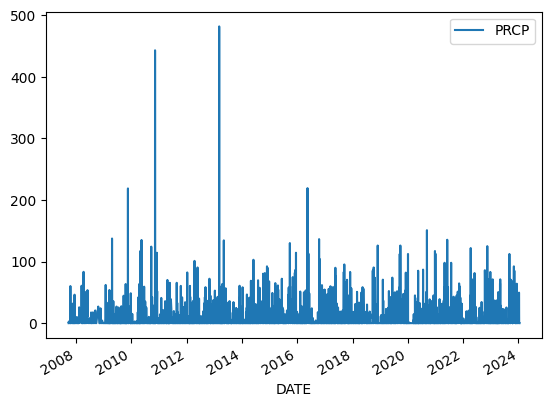

In [22]:
df[["PRCP"]].plot()

<Axes: xlabel='DATE'>

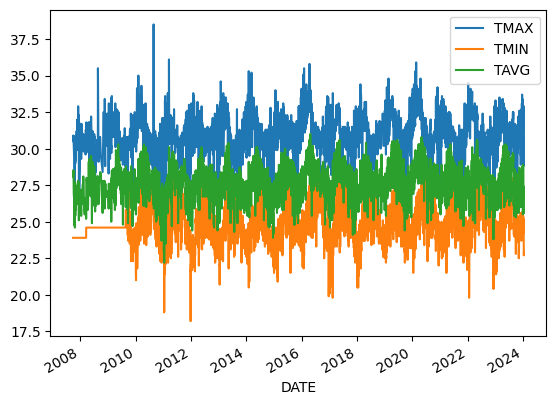

In [23]:
df[["TMAX","TMIN","TAVG"]].plot()

In [24]:
# Checking for outliers
# fields = ['PRCP', 'TAVG', 'TMAX', 'TMIN']
# for field in fields:
#     plt.figure(figsize=(10, 5))  # Adjust figure size as needed
#     sns.boxplot(x=df[field])
#     plt.title(f'Boxplot for {field}')
#     plt.xlabel(field)
#     plt.ylabel('Values')
#     plt.tight_layout()  # Adjust layout
#     plt.show()

In [25]:
df["target"] = df.shift(-1)["TMAX"]

In [26]:
df

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
2007-09-27,0.0,28.1,30.6,23.9,30.6
2007-09-28,0.0,28.5,30.6,23.9,30.6
2007-09-29,2.5,28.2,30.6,23.9,30.5
2007-09-30,1.0,28.3,30.5,23.9,30.9
2007-10-01,0.0,28.5,30.9,23.9,30.6
...,...,...,...,...,...
2024-01-10,0.0,26.6,28.8,25.0,31.7
2024-01-11,0.0,27.2,31.7,24.3,32.9
2024-01-13,0.0,27.3,32.9,22.7,32.9


In [27]:
# Remove last record because it doesnt have target
df = df.iloc[:-1,:]

In [28]:
df

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
2007-09-27,0.0,28.1,30.6,23.9,30.6
2007-09-28,0.0,28.5,30.6,23.9,30.6
2007-09-29,2.5,28.2,30.6,23.9,30.5
2007-09-30,1.0,28.3,30.5,23.9,30.9
2007-10-01,0.0,28.5,30.9,23.9,30.6
...,...,...,...,...,...
2024-01-09,3.0,27.0,30.8,25.2,28.8
2024-01-10,0.0,26.6,28.8,25.0,31.7
2024-01-11,0.0,27.2,31.7,24.3,32.9


In [29]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [30]:
predictors = ["PRCP", "TAVG", "TMAX", "TMIN"]

In [31]:
predictors

['PRCP', 'TAVG', 'TMAX', 'TMIN']

In [32]:
split_index = int(len(df) * 0.8)

# Split the dataset into training(80%) and testing(20%) sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]

print("Training set size:", len(train))
print("Testing set size:", len(test))

Training set size: 4383
Testing set size: 1096


In [33]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [34]:
predictions = reg.predict(test[predictors])

In [35]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

0.8522388370008828

In [36]:
#check actual values and predictions
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [37]:
combined

,actual,predictions
DATE,,
2020-11-20,32.4,30.521877
2020-11-21,30.3,31.952342
2020-11-22,30.6,30.461297
2020-11-23,30.6,30.710852
2020-11-24,30.0,30.693322
...,...,...
2024-01-09,28.8,30.743678
2024-01-10,31.7,29.477519
2024-01-11,32.9,31.362018


<Axes: xlabel='DATE'>

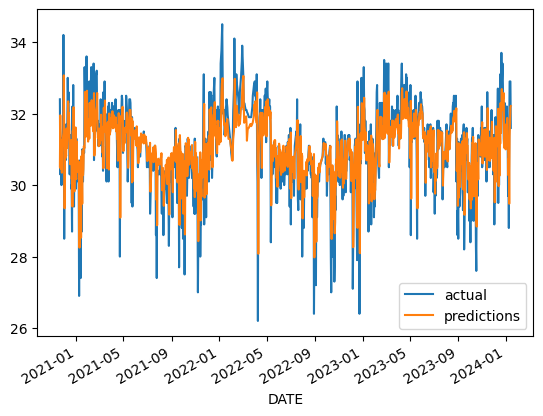

In [38]:
combined.plot()

In [39]:
reg.coef_

array([ 0.00289067,  0.16475763,  0.60163548, -0.0584312 ])

In [40]:
df["month_max"] = df["TMAX"].rolling(30).mean()

df["month_day_max"] = df["month_max"] / df["TMAX"]

df["max_min"] = df["TMAX"] / df["TMIN"]

/tmp/ipykernel_33/221050431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month_max"] = df["TMAX"].rolling(30).mean()
/tmp/ipykernel_33/221050431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month_day_max"] = df["month_max"] / df["TMAX"]
/tmp/ipykernel_33/221050431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [41]:
df

,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,max_min
DATE,,,,,,,,
2007-09-27,0.0,28.1,30.6,23.9,30.6,NaN,NaN,1.280335
2007-09-28,0.0,28.5,30.6,23.9,30.6,NaN,NaN,1.280335
2007-09-29,2.5,28.2,30.6,23.9,30.5,NaN,NaN,1.280335
2007-09-30,1.0,28.3,30.5,23.9,30.9,NaN,NaN,1.276151
2007-10-01,0.0,28.5,30.9,23.9,30.6,NaN,NaN,1.292887
...,...,...,...,...,...,...,...,...
2024-01-09,3.0,27.0,30.8,25.2,28.8,31.753333,1.030952,1.222222
2024-01-10,0.0,26.6,28.8,25.0,31.7,31.650000,1.098958,1.152000
2024-01-11,0.0,27.2,31.7,24.3,32.9,31.656667,0.998633,1.304527


In [42]:
statistical_values1 = df[['PRCP', 'TAVG', 'TMAX', 'TMIN', 'month_max', 'month_day_max', 'max_min']].describe()

print("Statistical values of data distribution:")
print(statistical_values1)

Statistical values of data distribution:
              PRCP         TAVG         TMAX         TMIN    month_max  \
count  5479.000000  5479.000000  5479.000000  5479.000000  5450.000000   
mean      6.908852    27.818252    31.059181    24.921537    31.061282   
std      18.440360     1.116646     1.218325     1.459827     0.796236   
min       0.000000    22.200000    25.100000    18.200000    29.260000   
25%       0.000000    27.100000    30.400000    23.900000    30.443750   
50%       0.000000    27.900000    31.100000    24.600000    30.986667   
75%       5.100000    28.600000    31.800000    25.900000    31.630000   
max     481.800000    31.000000    38.500000    29.300000    33.358333   

       month_day_max      max_min  
count    5450.000000  5479.000000  
mean        1.000784     1.250212  
std         0.032365     0.083702  
min         0.781558     1.065217  
25%         0.983282     1.186312  
50%         0.997801     1.250996  
75%         1.014088     1.303419  
max 

In [43]:
#Remove first 30 rows because month_max and month_day_max have NAN values
df = df.iloc[30:,:].copy()

In [44]:
#Function for make predictions
def create_predictions(predictors, df, reg):
    train = df.iloc[:split_index]
    test = df.iloc[split_index:]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [45]:
predictors = ["PRCP", "TAVG", "TMAX", "TMIN", "month_day_max", "max_min"]

In [46]:
error, combined = create_predictions(predictors, df, reg)
error

0.7786830914386339

<Axes: xlabel='DATE'>

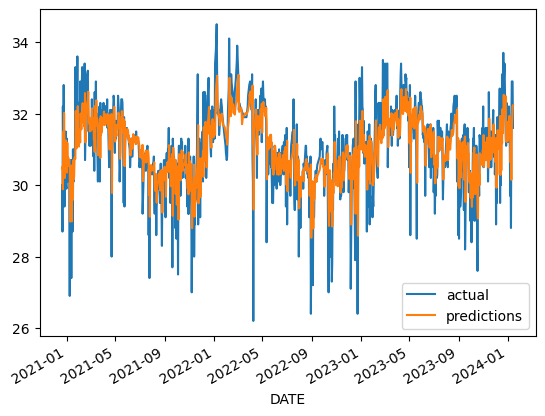

In [47]:
combined.plot()

In [48]:
reg.coef_

array([ 6.84735227e-05,  1.11663207e-01,  9.07762980e-01, -1.24735144e-01,
        1.14478327e+01, -1.63348918e+00])

In [49]:
df.corr()["target"]

PRCP            -0.122122
TAVG             0.416316
TMAX             0.656049
TMIN             0.091770
target           1.000000
month_max        0.563294
month_day_max   -0.356053
max_min          0.306057
Name: target, dtype: float64

In [50]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [51]:
combined.sort_values("diff", ascending=False).tail(20)

,actual,predictions,diff
DATE,,,
2023-02-28,31.8,31.789620,0.010380
2022-04-04,32.4,32.390288,0.009712
2022-11-07,30.7,30.691520,0.008480
2023-06-03,32.0,31.991944,0.008056
2022-06-22,30.8,30.791998,0.008002
2023-07-19,31.3,31.307918,0.007918
2021-06-20,31.2,31.207829,0.007829
2023-04-13,32.3,32.292355,0.007645
2022-07-30,30.7,30.707636,0.007636
